<a href="https://colab.research.google.com/github/Fujnaa/AnalizaDrustvenihMreza/blob/main/AnalizaDrustvenihMreza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analiza saradnje glumaca kroz Wikipedia**


---



In [ ]:
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.7/467.7 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.5 MB/s eta 0:00:00


In [ ]:
!pip install webdriver_manager

Najpre cemo se konektovati sa vikipedijom, što ćemo uraditi kroz Henry Cavill-ov wiki page. Pomoću beautiful soup paketa pročitaćemo HTML sa stranice i pronaći odgovarajuću tabelu koja sadrži sve link-ove do filmova u kojima je Henry Cavill glumio.

*Napomena*: Postoje neki filmovi koji nemaju svoj wiki page, time tabela ni ne sadrži potrebni link. Iz tog razloga ćemo morati da žrtvujemo pojedine podatke.

In [ ]:
import requests
from bs4 import BeautifulSoup

# URL of Henry Cavill's Wikipedia page
url = "https://en.wikipedia.org/wiki/Henry_Cavill"

# Get the page content
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find the filmography table
filmography_table = soup.find('table', {'class': 'wikitable sortable'})

# Get all movie links from the filmography table
movie_links = []
for row in filmography_table.find_all('tr')[1:]:  # Skip the header row
    cells = row.find_all('td')
    if len(cells) > 1:  # Ensure the row contains data cells
        title_cell = cells[1]
        link = title_cell.find('a', href=True)
        if link:
            movie_links.append((link.text.strip(), 'https://en.wikipedia.org' + link['href']))
        else:
            movie_links.append((title_cell.text.strip(), None))

# Print the movie links
for title, link in movie_links:
    print(title, link)

Laguna None
The Count of Monte Cristo https://en.wikipedia.org/wiki/The_Count_of_Monte_Cristo_(2002_film)
I Capture the Castle https://en.wikipedia.org/wiki/I_Capture_the_Castle_(film)
Hellraiser: Hellworld https://en.wikipedia.org/wiki/Hellraiser:_Hellworld
Tristan & Isolde https://en.wikipedia.org/wiki/Tristan_%26_Isolde_(film)
The Hunter None
Stardust https://en.wikipedia.org/wiki/Stardust_(2007_film)
Whatever Works https://en.wikipedia.org/wiki/Whatever_Works
Evan Marshall None
Immortals https://en.wikipedia.org/wiki/Immortals_(2011_film)
The Cold Light of Day https://en.wikipedia.org/wiki/The_Cold_Light_of_Day_(2012_film)
Man of Steel https://en.wikipedia.org/wiki/Man_of_Steel_(film)
The Man from U.N.C.L.E. https://en.wikipedia.org/wiki/The_Man_from_U.N.C.L.E._(film)
Batman v Superman: Dawn of Justice https://en.wikipedia.org/wiki/Batman_v_Superman:_Dawn_of_Justice
Sand Castle https://en.wikipedia.org/wiki/Sand_Castle_(film)
Clark Kent / Superman None
Mission: Impossible – Fallout

Potom ćemo pristupiti svakom filmu pojedinačno (tj. njihovoj wiki stranici) i preuzeti podatke o glumcima koji su učestvovali u filmu.

In [ ]:
def get_actors(movie_url):
    if not movie_url:
        return []
    response = requests.get(movie_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    cast_section = soup.find('span', id='Cast')
    if not cast_section:
        cast_section = soup.find('span', id='cast')  # Try alternative id if needed
    if not cast_section:
        return []
    cast_list = cast_section.find_next('ul')
    if not cast_list:
        return []
    actors = []
    for li in cast_list.find_all('li'):
        a_tag = li.find('a')
        if a_tag:
            actors.append(a_tag.text.strip())
    return actors

# Dictionary to store movie actors
movie_actors = {}

# Get actors for each movie
for title, link in movie_links:
    actors = get_actors(link)
    movie_actors[title] = actors

# Print the actors for each movie
for movie, actors in movie_actors.items():
    print(f"{movie}: {actors}")


Laguna: []
The Count of Monte Cristo: ['Jim Caviezel', 'Guy Pearce', 'Richard Harris', 'James Frain', 'Dagmara Domińczyk', 'Luis Guzmán', 'Michael Wincott', 'Henry Cavill', 'JB Blanc', 'Alex Norton', 'Patrick Godfrey', 'Freddie Jones', 'Helen McCrory', 'Christopher Adamson']
I Capture the Castle: []
Hellraiser: Hellworld: ['Doug Bradley', 'Lance Henriksen', 'Christopher Jacot', 'Katheryn Winnick', 'Khary Payton', 'Henry Cavill', 'Désirée Malonga']
Tristan & Isolde: ['James Franco', 'Thomas Sangster', 'Sophia Myles', 'Rufus Sewell', 'Mark Strong', 'Henry Cavill', "David O'Hara", 'Bronagh Gallagher', 'Graham Mullins', 'JB Blanc', 'Dexter Fletcher', 'Barbora Kodetová']
The Hunter: []
Stardust: ['Claire Danes', 'Charlie Cox', 'Michelle Pfeiffer', 'Mark Strong', 'Robert De Niro', 'Jason Flemyng', 'Rupert Everett', 'Ricky Gervais', 'Sienna Miller', "Peter O'Toole", 'Ian McKellen', 'Kate Magowan', 'Joanna Scanlan', 'Sarah Alexander', 'Mark Heap', 'Struan Rodger', 'Julian Rhind-Tutt', 'Adam Bu

Sve prikupljene podatke prikazaćemo kroz dijagram čiji će centar biti Henry.

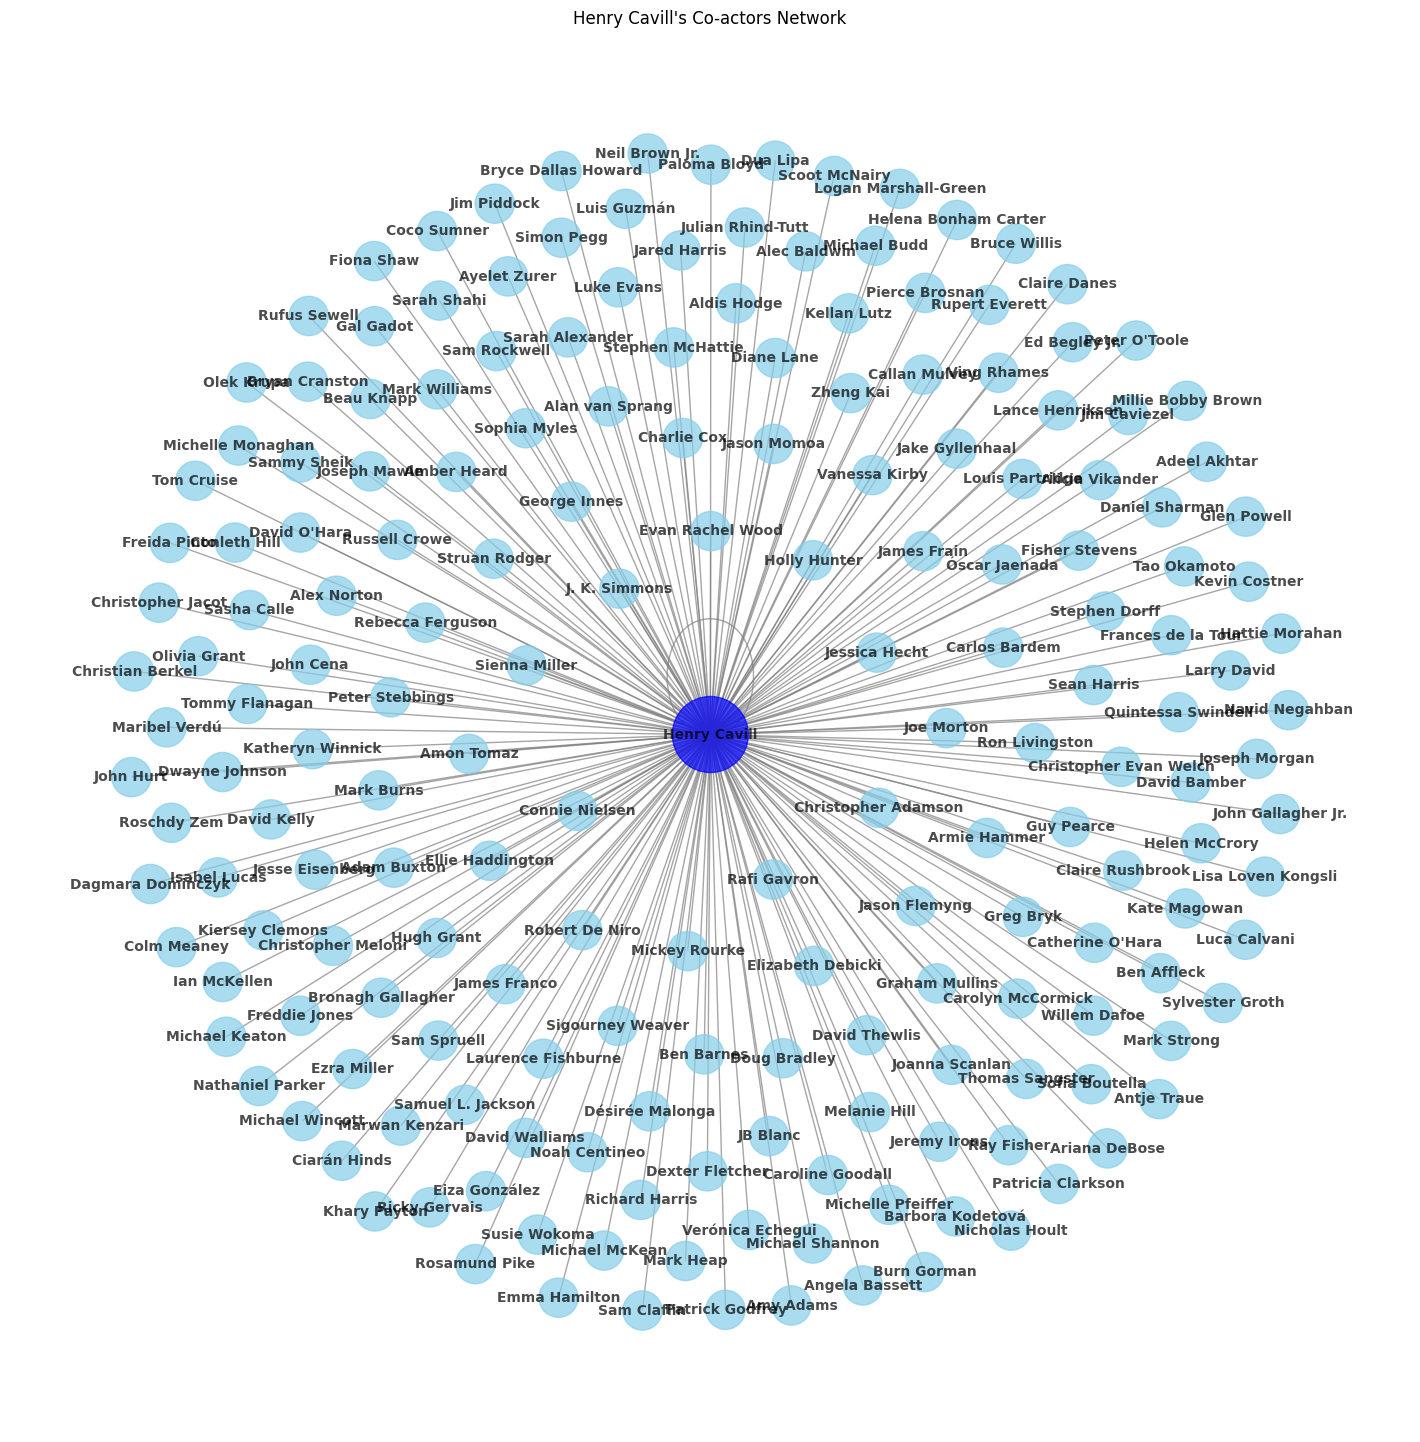

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for movie, actors in movie_actors.items():
    for actor in actors:
        G.add_node(actor, type='actor')
        G.add_edge('Henry Cavill', actor)

# Export the graph to a GEXF file
nx.write_gexf(G, "henry_cavill_movies.gexf")

# Draw the graph (optional)
node_colors = []
node_sizes = []
for node in G.nodes(data=True):
    if node[0] == 'Henry Cavill':
        node_colors.append('blue')
        node_sizes.append(3000)
    else:
        node_colors.append('skyblue')
        node_sizes.append(800)

plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G, k=0.3)  # Adjust k for better spacing
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, font_size=10, font_weight='bold', edge_color='gray', alpha=0.7)
plt.title("Henry Cavill's Co-actors Network")
plt.show()


# **Pokušaj dva: Proširivanje prikupljenih podataka na same glumce koji su sarađivali sa Henry-jem**

Kako ne bismo samo imali dijagram koji povezuje sve sa našim izvorom podataka, moramo proći i kroz stranice glumaca koji su glumili sa Henry-jem.

In [ ]:
import requests
from bs4 import BeautifulSoup
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
def get_filmography_and_actors(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    filmography_table = soup.find('table', {'class': 'wikitable sortable'})

    movie_links = []
    for row in filmography_table.find_all('tr')[1:]:  # Skip the header row
        cells = row.find_all('td')
        if len(cells) > 1:  # Ensure the row contains data cells
            title_cell = cells[1]
            link = title_cell.find('a', href=True)
            if link:
                movie_links.append((link.text.strip(), 'https://en.wikipedia.org' + link['href']))
            else:
                movie_links.append((title_cell.text.strip(), None))

    movie_actors = {}
    for title, link in movie_links:
        actors = get_actors(link)
        movie_actors[title] = actors

    return movie_actors

def get_actors(movie_url):
    if not movie_url:
        return []
    response = requests.get(movie_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    cast_section = soup.find('span', id='Cast')
    if not cast_section:
        cast_section = soup.find('span', id='cast')  # Try alternative id if needed
    if not cast_section:
        return []
    cast_list = cast_section.find_next('ul')
    if not cast_list:
        return []
    actors = []
    for li in cast_list.find_all('li'):
        a_tag = li.find('a')
        if a_tag:
            actors.append(a_tag.text.strip())
    return actors


In [ ]:
def get_actor_filmography(actor_name):
    search_url = f"https://en.wikipedia.org/wiki/{actor_name.replace(' ', '_')}"
    response = requests.get(search_url)
    if response.status_code != 200:
        return []

    soup = BeautifulSoup(response.content, 'html.parser')

    filmography_tables = soup.find_all('table', {'class': 'wikitable'})
    filmography = []

    for table in filmography_tables:
        for row in table.find_all('tr')[1:]:
            cells = row.find_all('td')
            if len(cells) > 1:
                movie_cell = cells[1]
                link = movie_cell.find('a', href=True)
                if link and 'film' in link['href']:
                    movie_title = link.text.strip()
                    filmography.append(movie_title)

    return filmography


In [ ]:
def create_network(movie_actors):
    G = nx.Graph()
    G.add_node("Henry Cavill", type='actor')
    co_actor_filmographies = {}

    for movie, actors in movie_actors.items():
        for actor in actors:
            G.add_node(actor, type='actor')
            G.add_edge("Henry Cavill", actor)
            if actor not in co_actor_filmographies:
                co_actor_filmographies[actor] = get_actor_filmography(actor)

    for actor, filmography in co_actor_filmographies.items():
        for movie in filmography:
            if movie in movie_actors:
                for co_actor in movie_actors[movie]:
                    if co_actor != actor:
                        G.add_edge(actor, co_actor)

    return G


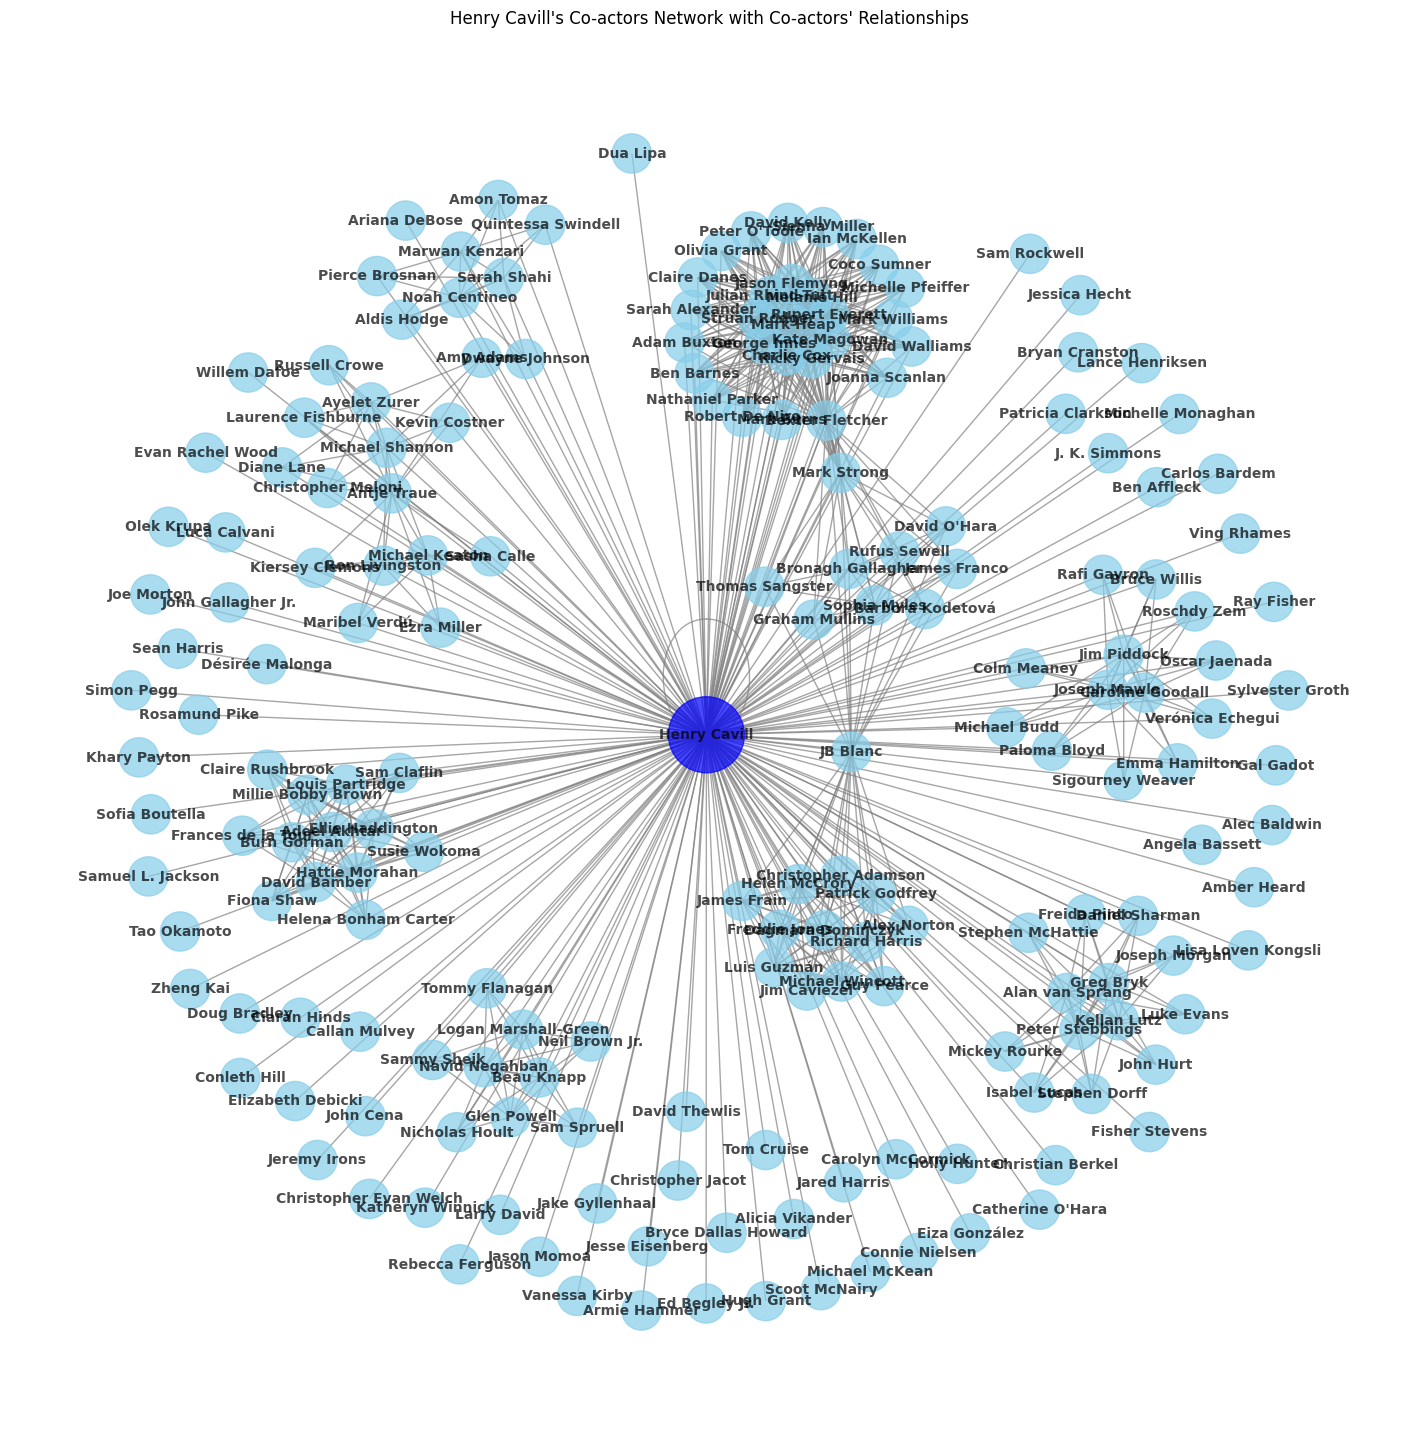

In [ ]:
henry_cavill_url = "https://en.wikipedia.org/wiki/Henry_Cavill"
movie_actors = get_filmography_and_actors(henry_cavill_url)
G = create_network(movie_actors)

# Export the graph to a GEXF file
nx.write_gexf(G, "henry_cavill_movies_and_coactors_extended.gexf")

# Optional: Draw the graph
node_colors = ['blue' if node == 'Henry Cavill' else 'skyblue' for node in G.nodes()]
node_sizes = [3000 if node == 'Henry Cavill' else 800 for node in G.nodes()]

plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G, k=0.3)  # Adjust k for better spacing
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, font_size=10, font_weight='bold', edge_color='gray', alpha=0.7)
plt.title("Henry Cavill's Co-actors Network with Co-actors' Relationships")
plt.show()


# **Pokušaj Tri: Preuzimanje podataka od saradnika - saradnika Henry-ja**

Vidimo da je dijagram znatno gušći i sadrži više podataka, ali da li možemo ovo da proširimo još više?

Sada ćemo da preuzmemo još više podataka tako što algoritam modifikujem da sa dubinom=1 prodje jos 20 saradnika našeg centralnog node-a i preuzmemo njihove podatke (Execution trajao oko 30min).

Ovo ćemo kasnije provući kroz Gephi i analizirati.

In [ ]:
import requests
from bs4 import BeautifulSoup
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:
def get_filmography_and_actors(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    filmography_table = soup.find('table', {'class': 'wikitable sortable'})

    if filmography_table is None:
        return {}  # Return an empty dictionary if filmography table is not found

    movie_links = []
    for row in filmography_table.find_all('tr')[1:]:  # Skip the header row
        cells = row.find_all('td')
        if len(cells) > 1:  # Ensure the row contains data cells
            title_cell = cells[1]
            link = title_cell.find('a', href=True)
            if link:
                movie_links.append((link.text.strip(), 'https://en.wikipedia.org' + link['href']))
            else:
                movie_links.append((title_cell.text.strip(), None))

    movie_actors = {}
    for title, link in movie_links:
        actors = get_actors(link)
        movie_actors[title] = actors

    return movie_actors

def get_actors(movie_url):
    if not movie_url:
        return []
    response = requests.get(movie_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    cast_section = soup.find('span', id='Cast')
    if not cast_section:
        cast_section = soup.find('span', id='cast')  # Try alternative id if needed
    if not cast_section:
        return []
    cast_list = cast_section.find_next('ul')
    if not cast_list:
        return []
    actors = []
    for li in cast_list.find_all('li'):
        a_tag = li.find('a')
        if a_tag:
            actors.append(a_tag.text.strip())
    return actors

def get_actor_filmography(actor_name):
    actor_name = actor_name.replace(' ', '_')
    search_url = f"https://en.wikipedia.org/wiki/{actor_name}"
    response = requests.get(search_url)
    if response.status_code != 200:
        return []

    soup = BeautifulSoup(response.content, 'html.parser')

    filmography_tables = soup.find_all('table', {'class': 'wikitable'})
    filmography = []

    for table in filmography_tables:
        for row in table.find_all('tr')[1:]:
            cells = row.find_all('td')
            if len(cells) > 1:
                movie_cell = cells[1]
                link = movie_cell.find('a', href=True)
                if link and 'film' in link['href']:
                    movie_title = link.text.strip()
                    filmography.append(movie_title)

    return filmography

In [ ]:
def create_network(start_actor, max_depth=2, max_actors=20):
    G = nx.Graph()
    G.add_node(start_actor, type='actor')
    actors_to_scrape = [(start_actor, 0)]  # Tuple of (actor_name, depth)
    scraped_actors = set()

    while actors_to_scrape and len(scraped_actors) < max_actors:
        actor, depth = actors_to_scrape.pop(0)
        if depth >= max_depth or actor in scraped_actors:
            continue

        print(f"Scraping {actor}'s filmography at depth {depth}...")
        movie_actors = get_filmography_and_actors(f"https://en.wikipedia.org/wiki/{actor.replace(' ', '_')}")
        scraped_actors.add(actor)

        print(f"Filmography of {actor}:")
        for movie, actors in movie_actors.items():
            print(f"- {movie}: {actors}")

        co_actor_filmographies = {}
        for movie, actors in movie_actors.items():
            if actor in actors:
                for co_actor in actors:
                    if co_actor != actor:
                        G.add_node(co_actor, type='actor')
                        G.add_edge(actor, co_actor)
                        if (co_actor, depth + 1) not in actors_to_scrape:
                            actors_to_scrape.append((co_actor, depth + 1))
                    if co_actor not in co_actor_filmographies:
                        co_actor_filmographies[co_actor] = get_actor_filmography(co_actor)

        print(f"Filmographies of co-actors:")
        for co_actor, filmography in co_actor_filmographies.items():
            print(f"- {co_actor}: {filmography}")

        for co_actor, filmography in co_actor_filmographies.items():
            for movie in filmography:
                if movie in movie_actors:
                    for co_co_actor in movie_actors[movie]:
                        if co_co_actor != co_actor:
                            G.add_node(co_co_actor, type='actor')
                            G.add_edge(co_actor, co_co_actor)
                            if (co_co_actor, depth + 2) not in actors_to_scrape:
                                actors_to_scrape.append((co_co_actor, depth + 2))

    return G

Scraping Henry Cavill's filmography at depth 0...
Filmography of Henry Cavill:
- Laguna: []
- The Count of Monte Cristo: ['Jim Caviezel', 'Guy Pearce', 'Richard Harris', 'James Frain', 'Dagmara Domińczyk', 'Luis Guzmán', 'Michael Wincott', 'Henry Cavill', 'JB Blanc', 'Alex Norton', 'Patrick Godfrey', 'Freddie Jones', 'Helen McCrory', 'Christopher Adamson']
- I Capture the Castle: []
- Hellraiser: Hellworld: ['Doug Bradley', 'Lance Henriksen', 'Christopher Jacot', 'Katheryn Winnick', 'Khary Payton', 'Henry Cavill', 'Désirée Malonga']
- Tristan & Isolde: ['James Franco', 'Thomas Sangster', 'Sophia Myles', 'Rufus Sewell', 'Mark Strong', 'Henry Cavill', "David O'Hara", 'Bronagh Gallagher', 'Graham Mullins', 'JB Blanc', 'Dexter Fletcher', 'Barbora Kodetová']
- The Hunter: []
- Stardust: ['Claire Danes', 'Charlie Cox', 'Michelle Pfeiffer', 'Mark Strong', 'Robert De Niro', 'Jason Flemyng', 'Rupert Everett', 'Ricky Gervais', 'Sienna Miller', "Peter O'Toole", 'Ian McKellen', 'Kate Magowan', 'Jo

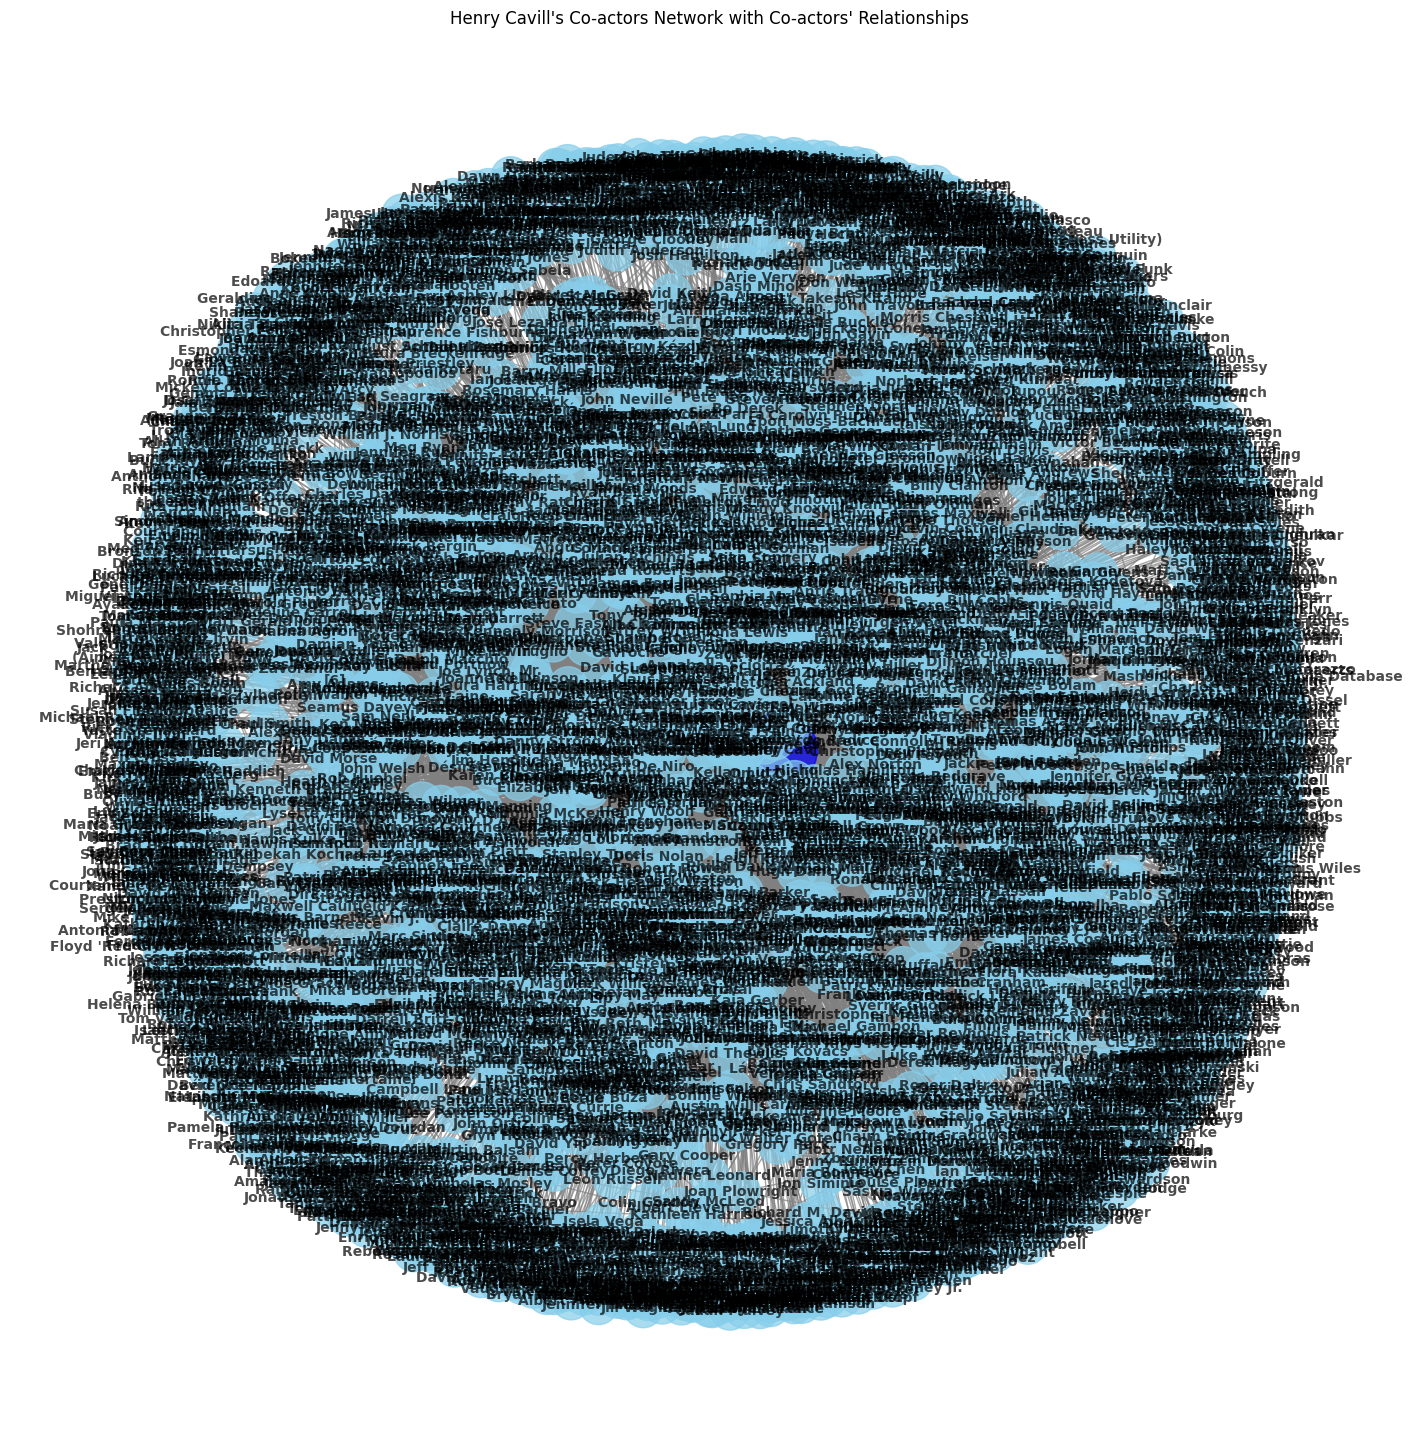

In [ ]:
start_actor = "Henry Cavill"
G = create_network(start_actor, max_depth=2, max_actors=20)

# Export the graph to a GEXF file
nx.write_gexf(G, f"{start_actor.lower().replace(' ', '_')}_network.gexf")

# Optional: Draw the graph
node_colors = ['blue' if node == start_actor else 'skyblue' for node in G.nodes()]
node_sizes = [3000 if node == start_actor else 800 for node in G.nodes()]

plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G, k=0.3)  # Adjust k for better spacing
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, font_size=10, font_weight='bold', edge_color='gray', alpha=0.7)
plt.title(f"{start_actor}'s Co-actors Network with Co-actors' Relationships")
plt.show()
